<a href="https://colab.research.google.com/github/inesdarosa/visualizaciones_analisis/blob/main/indep_C7_mediana_6horas_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from datetime import datetime
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import math
from keras import models, layers, optimizers, regularizers
import random
from keras.layers import Dense, Activation, Dropout
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm

In [ ]:
indep_C7 = pd.read_csv('/content/drive/MyDrive/ejercicios_proyectos/ancap/DATACHALLENGE 2022/indep_C7.csv')

In [ ]:
indep_C7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1049 non-null   int64  
 1   tdc_phd.pi_21030    1048 non-null   float64
 2   tdc_phd.pic_21034   1048 non-null   float64
 3   tdc_phd.pi_21035    1048 non-null   float64
 4   tdc_phd.ti_21046    1048 non-null   float64
 5   tdc_phd.tic_21047   1048 non-null   float64
 6   tdc_phd.ti_21048    1048 non-null   float64
 7   tdc_phd.ti_21050    1048 non-null   float64
 8   tdc_phd.ti_21049    1048 non-null   float64
 9   tdc_phd.tic_21051   1048 non-null   float64
 10  tdc_phd.ti_21052    1048 non-null   float64
 11  tdc_phd.li_21018    1048 non-null   float64
 12  tdc_phd.lic_21022   1048 non-null   float64
 13  tdc_phd.fic_21018   1048 non-null   float64
 14  tdc_phd.fic_24002   1048 non-null   float64
 15  tdc_phd.fi_21019    1048 non-null   float64
 16  tdc_ph

In [ ]:
indep_C7 = indep_C7.drop(['Unnamed: 0'], axis=1)

In [ ]:
indep_C7 = indep_C7.drop(1048)

In [ ]:
indep_C7

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,Contenido_C7_Total
0,0.822950,0.828340,0.850390,99.538420,74.100520,39.095540,146.655270,133.963400,133.960700,142.35582,...,452.574435,19.292030,20.500545,202.688870,26.805790,10.900415,20.879120,140.973370,42.186225,1.58
1,0.818255,0.828735,0.837565,102.348440,72.366000,31.766700,151.701355,134.497830,134.492235,145.12355,...,453.096310,20.234720,20.297700,175.962550,23.155510,10.845210,23.945960,143.887500,35.289840,0.87
2,0.821700,0.833630,0.851885,104.282020,75.835110,34.209830,150.374030,133.890080,133.893775,146.55833,...,430.011735,18.199170,20.497570,215.746375,33.092155,9.766465,18.967735,144.819105,37.779400,1.29
3,0.831545,0.845390,0.856660,103.022605,77.232510,28.429250,151.449585,134.733420,134.735405,147.79601,...,514.515205,17.453200,20.499545,285.436690,39.387850,9.381635,18.674365,146.075840,32.042325,1.90
4,0.817085,0.837985,0.847255,100.207360,77.798725,30.769290,148.100945,135.010385,134.990040,145.55636,...,451.301755,15.510420,20.498910,412.012370,46.110985,10.543075,16.638055,143.695970,32.648460,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,0.765955,0.829830,0.883575,93.394680,72.895990,39.241700,143.239405,129.723530,129.720350,140.38118,...,345.466630,18.224015,20.498600,280.821130,43.632125,10.351960,13.893960,138.741250,41.335090,1.64
1044,0.787395,0.828685,0.970645,93.684680,75.353260,46.744565,139.546805,130.070815,130.071650,137.57069,...,372.771105,21.634440,20.499570,367.380735,46.150395,10.899900,16.457490,136.351570,48.416965,0.77
1045,0.811500,0.828180,0.991355,92.718120,75.642360,49.031650,139.444000,130.282365,130.278885,137.27507,...,343.681205,18.547050,20.498925,348.554165,47.526410,11.050040,14.087620,135.809980,50.069850,2.79
1046,0.835270,0.827950,1.016040,92.918960,74.904570,52.014820,140.007210,130.499350,130.501735,137.91562,...,360.195780,20.135540,20.498490,309.076725,42.009955,11.100215,16.208370,136.539320,52.868845,2.00


In [ ]:
indep_C7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 0 to 1047
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tdc_phd.pi_21030    1048 non-null   float64
 1   tdc_phd.pic_21034   1048 non-null   float64
 2   tdc_phd.pi_21035    1048 non-null   float64
 3   tdc_phd.ti_21046    1048 non-null   float64
 4   tdc_phd.tic_21047   1048 non-null   float64
 5   tdc_phd.ti_21048    1048 non-null   float64
 6   tdc_phd.ti_21050    1048 non-null   float64
 7   tdc_phd.ti_21049    1048 non-null   float64
 8   tdc_phd.tic_21051   1048 non-null   float64
 9   tdc_phd.ti_21052    1048 non-null   float64
 10  tdc_phd.li_21018    1048 non-null   float64
 11  tdc_phd.lic_21022   1048 non-null   float64
 12  tdc_phd.fic_21018   1048 non-null   float64
 13  tdc_phd.fic_24002   1048 non-null   float64
 14  tdc_phd.fi_21019    1048 non-null   float64
 15  tdc_phd.fic_22001   1048 non-null   float64
 16  tdc_ph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

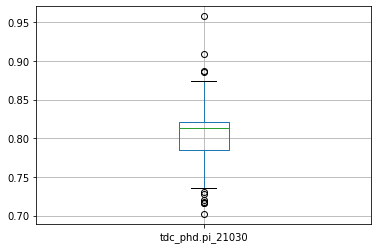

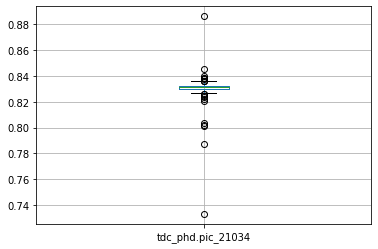

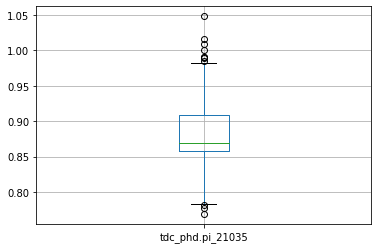

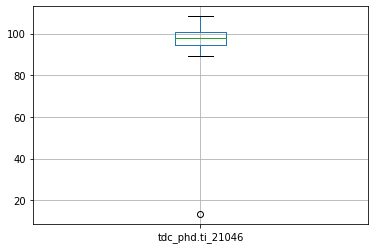

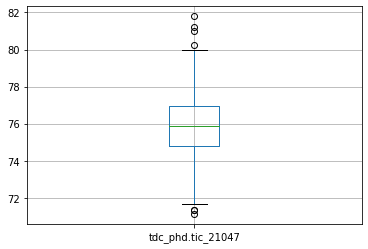

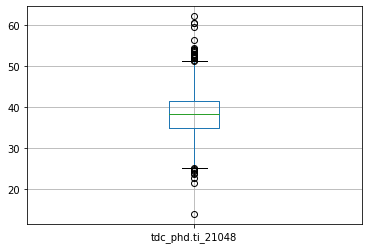

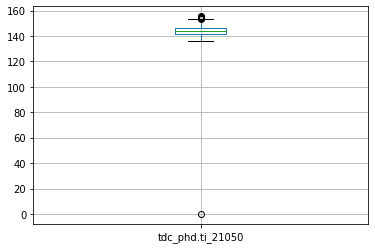

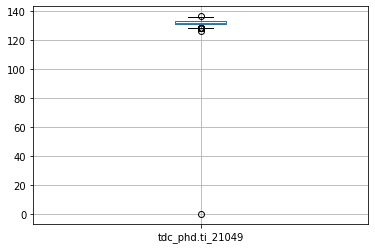

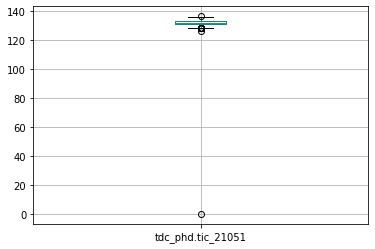

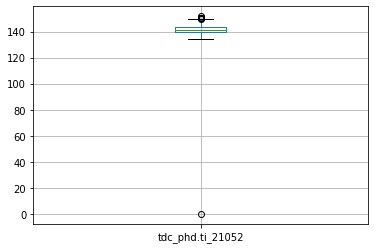

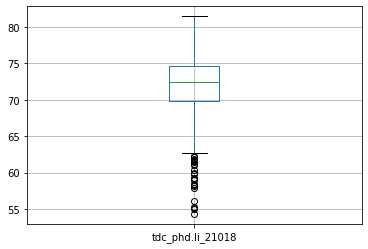

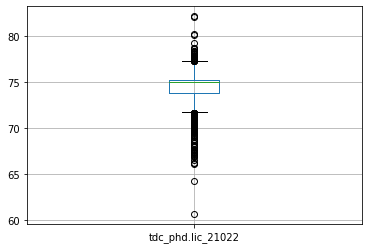

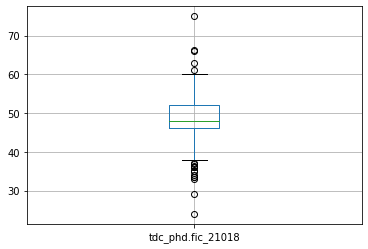

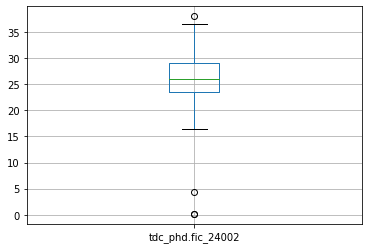

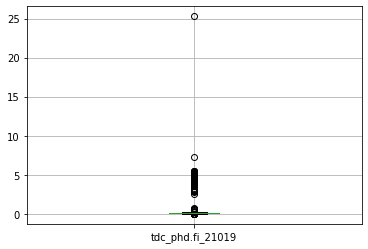

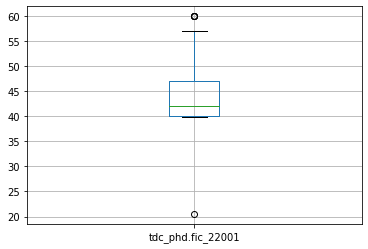

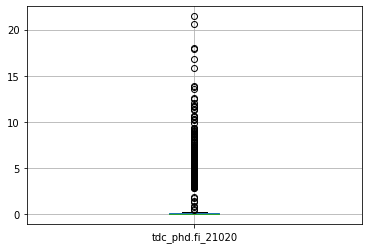

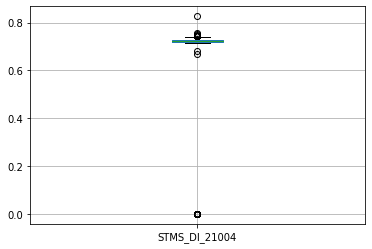

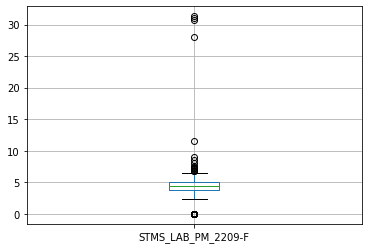

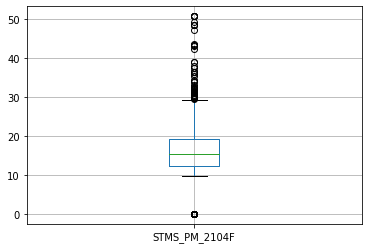

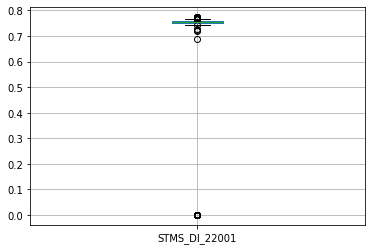

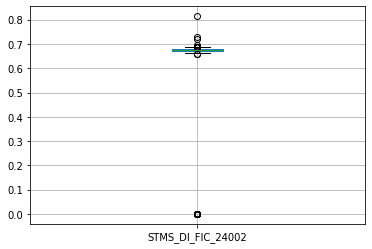

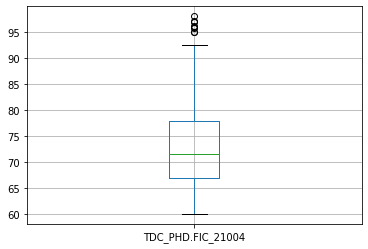

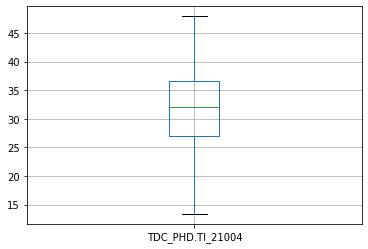

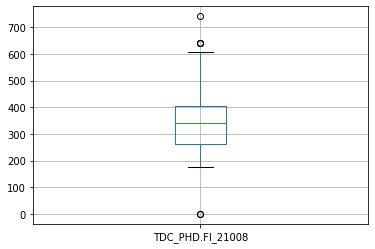

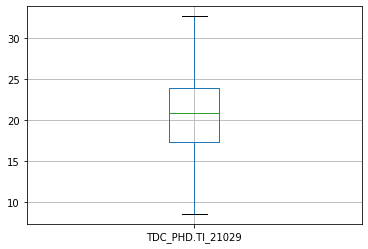

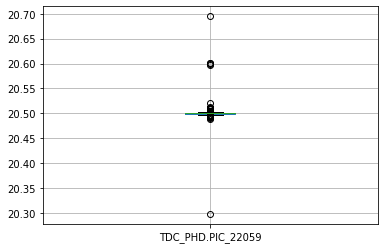

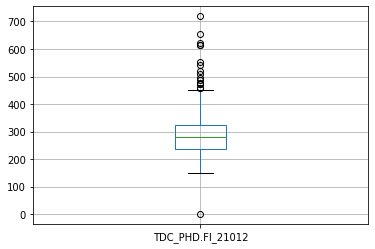

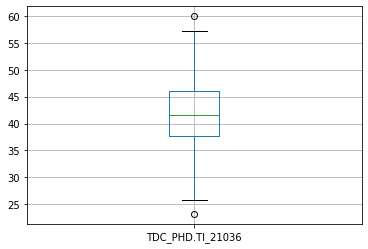

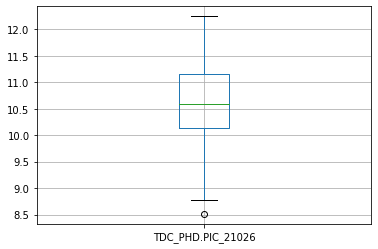

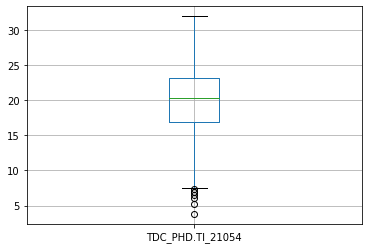

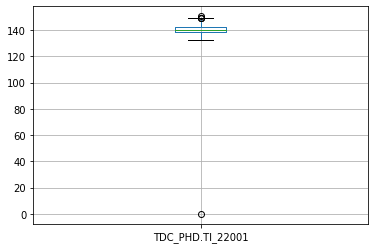

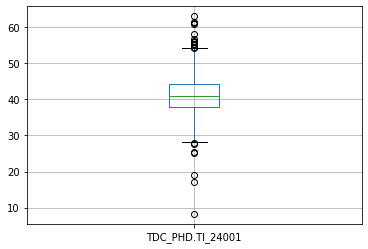

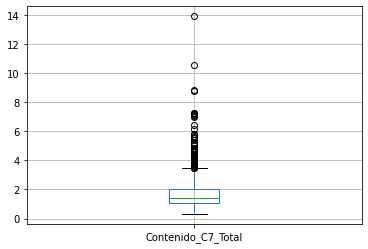

In [ ]:
for i, col in enumerate(indep_C7.columns):
    plt.figure()
    # create scatterplot    
    indep_C7.boxplot(column=[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


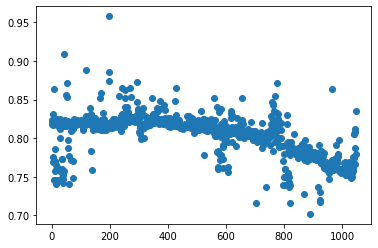

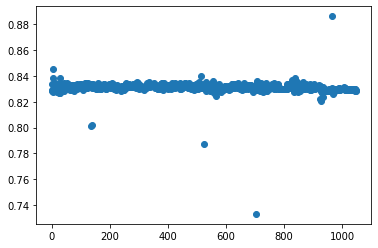

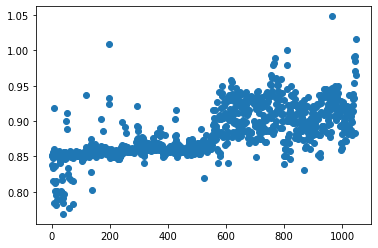

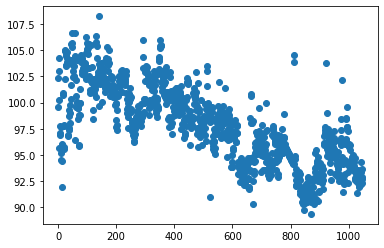

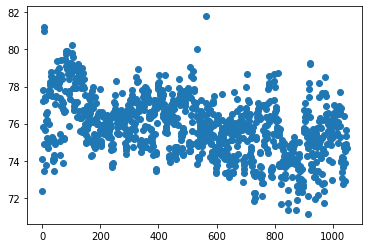

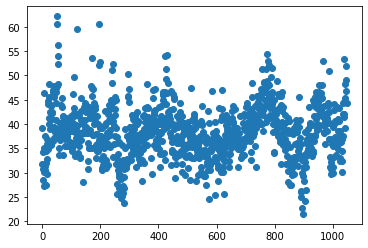

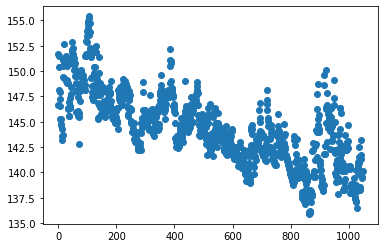

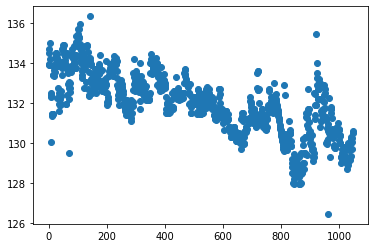

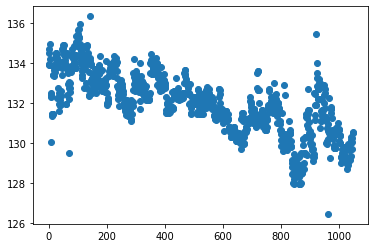

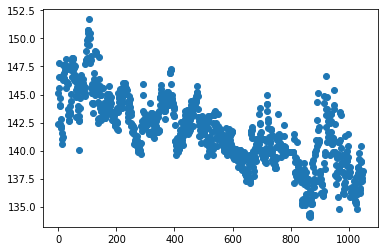

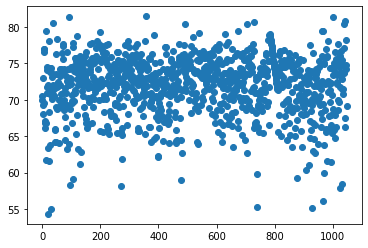

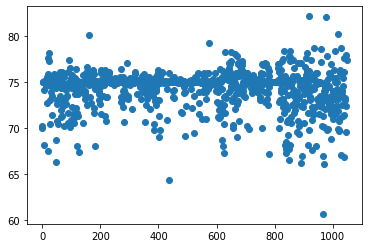

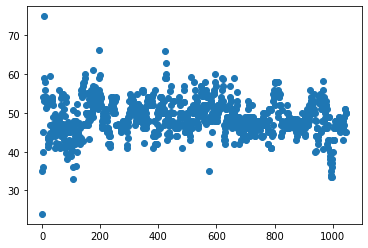

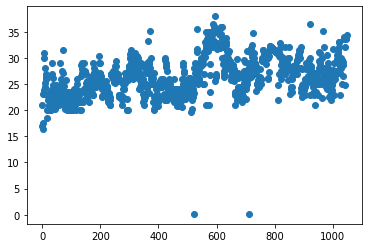

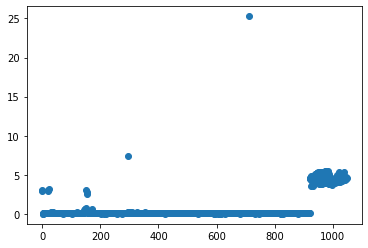

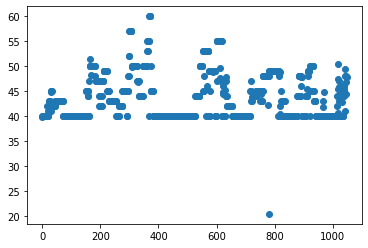

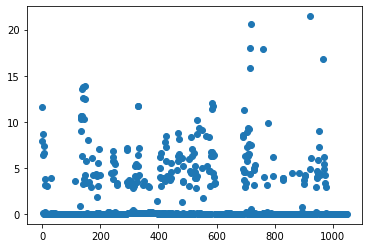

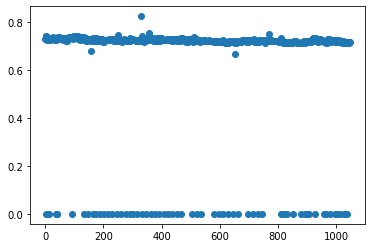

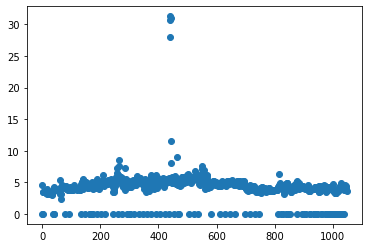

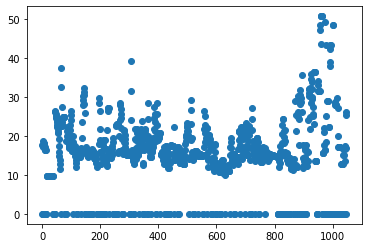

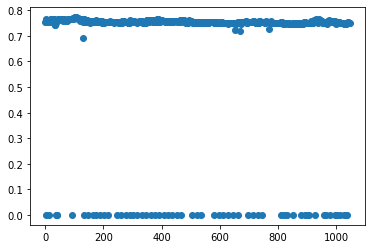

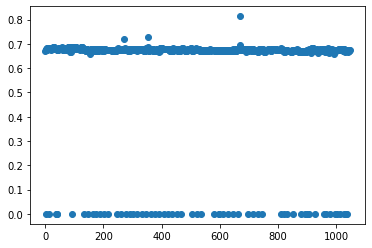

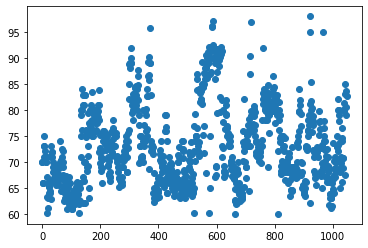

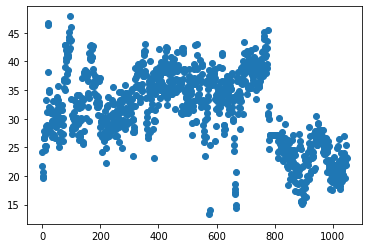

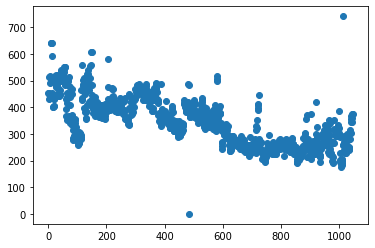

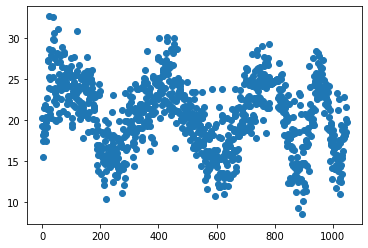

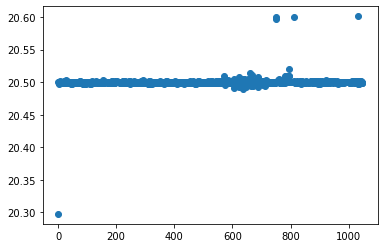

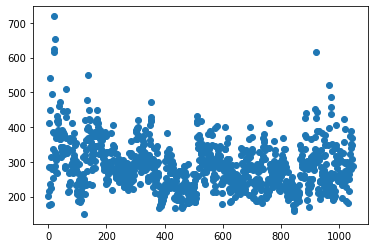

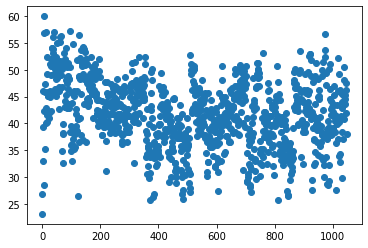

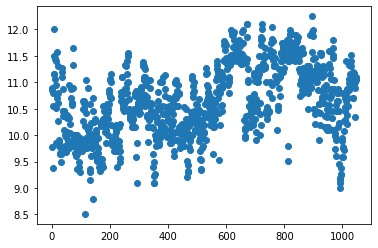

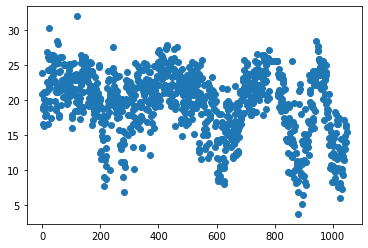

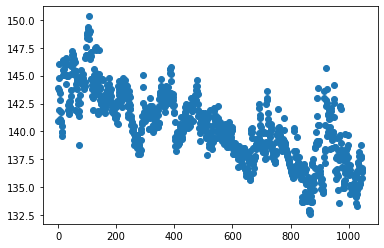

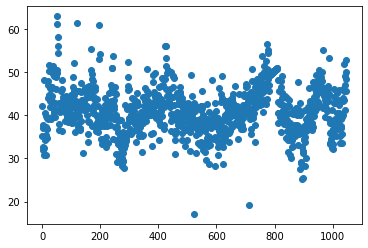

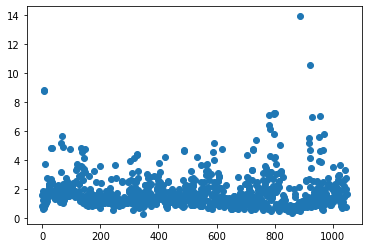

In [ ]:
for i, col in enumerate(indep_C7.columns):
    plt.figure()
    # create scatterplot
    plt.scatter(x=indep_C7.index, y=indep_C7[col], )

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['tdc_phd.ti_21046'] < 20].index)

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['tdc_phd.ti_21050'] == 0].index)

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['tdc_phd.ti_21049'] == 0].index)

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['tdc_phd.tic_21051'] == 0].index)

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['tdc_phd.ti_21052'] == 0].index)

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['tdc_phd.fi_21019'] > 20].index)

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['tdc_phd.fic_22001'] < 25].index)

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['STMS_LAB_PM_2209-F'] > 25].index)

In [ ]:
indep_C7 = indep_C7.drop(indep_C7[indep_C7['TDC_PHD.TI_22001'] == 25].index)

In [ ]:
indep_C7

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,Contenido_C7_Total
0,0.822950,0.828340,0.850390,99.538420,74.100520,39.095540,146.655270,133.963400,133.960700,142.35582,...,452.574435,19.292030,20.500545,202.688870,26.805790,10.900415,20.879120,140.973370,42.186225,1.58
1,0.818255,0.828735,0.837565,102.348440,72.366000,31.766700,151.701355,134.497830,134.492235,145.12355,...,453.096310,20.234720,20.297700,175.962550,23.155510,10.845210,23.945960,143.887500,35.289840,0.87
2,0.821700,0.833630,0.851885,104.282020,75.835110,34.209830,150.374030,133.890080,133.893775,146.55833,...,430.011735,18.199170,20.497570,215.746375,33.092155,9.766465,18.967735,144.819105,37.779400,1.29
3,0.831545,0.845390,0.856660,103.022605,77.232510,28.429250,151.449585,134.733420,134.735405,147.79601,...,514.515205,17.453200,20.499545,285.436690,39.387850,9.381635,18.674365,146.075840,32.042325,1.90
4,0.817085,0.837985,0.847255,100.207360,77.798725,30.769290,148.100945,135.010385,134.990040,145.55636,...,451.301755,15.510420,20.498910,412.012370,46.110985,10.543075,16.638055,143.695970,32.648460,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,0.765955,0.829830,0.883575,93.394680,72.895990,39.241700,143.239405,129.723530,129.720350,140.38118,...,345.466630,18.224015,20.498600,280.821130,43.632125,10.351960,13.893960,138.741250,41.335090,1.64
1044,0.787395,0.828685,0.970645,93.684680,75.353260,46.744565,139.546805,130.070815,130.071650,137.57069,...,372.771105,21.634440,20.499570,367.380735,46.150395,10.899900,16.457490,136.351570,48.416965,0.77
1045,0.811500,0.828180,0.991355,92.718120,75.642360,49.031650,139.444000,130.282365,130.278885,137.27507,...,343.681205,18.547050,20.498925,348.554165,47.526410,11.050040,14.087620,135.809980,50.069850,2.79
1046,0.835270,0.827950,1.016040,92.918960,74.904570,52.014820,140.007210,130.499350,130.501735,137.91562,...,360.195780,20.135540,20.498490,309.076725,42.009955,11.100215,16.208370,136.539320,52.868845,2.00


In [ ]:
indep_C7.dropna(inplace=True)

In [ ]:
indep_C7[indep_C7.columns[:-1]]

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.TI_21004,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001
0,0.822950,0.828340,0.850390,99.538420,74.100520,39.095540,146.655270,133.963400,133.960700,142.35582,...,21.745820,452.574435,19.292030,20.500545,202.688870,26.805790,10.900415,20.879120,140.973370,42.186225
1,0.818255,0.828735,0.837565,102.348440,72.366000,31.766700,151.701355,134.497830,134.492235,145.12355,...,24.094090,453.096310,20.234720,20.297700,175.962550,23.155510,10.845210,23.945960,143.887500,35.289840
2,0.821700,0.833630,0.851885,104.282020,75.835110,34.209830,150.374030,133.890080,133.893775,146.55833,...,20.739745,430.011735,18.199170,20.497570,215.746375,33.092155,9.766465,18.967735,144.819105,37.779400
3,0.831545,0.845390,0.856660,103.022605,77.232510,28.429250,151.449585,134.733420,134.735405,147.79601,...,20.036340,514.515205,17.453200,20.499545,285.436690,39.387850,9.381635,18.674365,146.075840,32.042325
4,0.817085,0.837985,0.847255,100.207360,77.798725,30.769290,148.100945,135.010385,134.990040,145.55636,...,19.589830,451.301755,15.510420,20.498910,412.012370,46.110985,10.543075,16.638055,143.695970,32.648460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,0.765955,0.829830,0.883575,93.394680,72.895990,39.241700,143.239405,129.723530,129.720350,140.38118,...,19.608440,345.466630,18.224015,20.498600,280.821130,43.632125,10.351960,13.893960,138.741250,41.335090
1044,0.787395,0.828685,0.970645,93.684680,75.353260,46.744565,139.546805,130.070815,130.071650,137.57069,...,25.376940,372.771105,21.634440,20.499570,367.380735,46.150395,10.899900,16.457490,136.351570,48.416965
1045,0.811500,0.828180,0.991355,92.718120,75.642360,49.031650,139.444000,130.282365,130.278885,137.27507,...,21.919060,343.681205,18.547050,20.498925,348.554165,47.526410,11.050040,14.087620,135.809980,50.069850
1046,0.835270,0.827950,1.016040,92.918960,74.904570,52.014820,140.007210,130.499350,130.501735,137.91562,...,23.353180,360.195780,20.135540,20.498490,309.076725,42.009955,11.100215,16.208370,136.539320,52.868845


In [ ]:
indep_C7[indep_C7.columns[33:]]

,Contenido_C7_Total
0,1.58
1,0.87
2,1.29
3,1.90
4,0.68
...,...
1043,1.64
1044,0.77
1045,2.79
1046,2.00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(indep_C7[indep_C7.columns[:-1]], indep_C7[indep_C7.columns[33:]], test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(831, 33)
(831, 1)
(208, 33)
(208, 1)


In [ ]:
X_train = np.array(X_train)
X_train.shape

(831, 33)

In [ ]:
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_test.shape, y_train.shape, y_test.shape)

(208, 33) (831, 1) (208, 1)


In [ ]:
XY_scaler = MinMaxScaler()
X_data_train = XY_scaler.fit_transform(X_train)
Y_data_train = XY_scaler.fit_transform(y_train)

X_data_test = XY_scaler.fit_transform(X_test)
Y_data_test = XY_scaler.fit_transform(y_test)

In [ ]:
Y_data_train.shape

(831, 1)

In [ ]:
Y_data_train

In [ ]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=33,
                       units=64, 
                       activation='relu'))


model.add(layers.Dense(input_dim=64,
                       units=32,
                       activation='relu'))
model.add(layers.Dropout(0.2))

# add the output layer
model.add(layers.Dense(input_dim=32,
                       units=1,
                       activation='linear'))

# define our loss function and optimizer
model.compile(loss='mean_squared_error',
              # Adam is a kind of gradient descent
              optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                2176      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_data_train, Y_data_train, epochs=100, batch_size=10)

Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 0.0172
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0063
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 12/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 13/100
84/84 [=================

In [ ]:
ypred = model.predict(X_data_test)
print("MSE: %.4f" % mean_squared_error(Y_data_test, ypred))

7/7 [==============================] - 0s 2ms/step
MSE: 0.0194


In [ ]:
ytest_orig = XY_scaler.inverse_transform(Y_data_test)
ypred_orig = XY_scaler.inverse_transform(ypred)

In [ ]:
print("MSE sin escalar: %.4f" % mean_squared_error(ytest_orig, ypred_orig))

MSE sin escalar: 0.8267


In [ ]:
print(sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig)))

[42]


In [ ]:
len(ytest_orig) - sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig))

array([166])

In [2]:
42*100/208

20.192307692307693

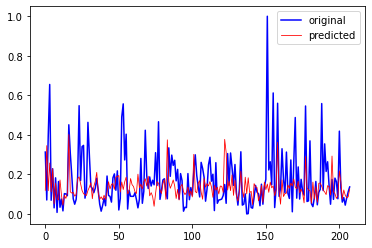

In [ ]:
x_ax = range(len(ypred))
#plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, Y_data_test, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
history = model.fit(X_data_train, Y_data_train, epochs=100, batch_size=10)

# evaluate accuracy
train_acc = model.evaluate(X_data_train, Y_data_train, batch_size=32)
test_acc = model.evaluate(X_data_test, Y_data_test, batch_size=32)
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

Epoch 1/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 10/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 11/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 12/100
84/84 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 13/100
84/84 [=================

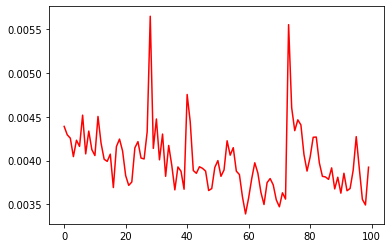

In [ ]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()